# Moringa School Week 9 Independent Project(Naive Bayes Classifier)

# Defining the Question

**1.   Specifying the Question**

This week's project requires us to implement a Naive Bayes classifier. Once we conduct the experiments, we will calculate the resulting metrics.

More specifically will be predicting whether an email is a spam or not.

**2.   Defining the Metric for Success**

f_1 score and accuracy will be the two many attributes that we shall use to check on the accuracy of the models we shall develop.

**3.   Understanding the context**

The aim of this project is to use the dataset provided to predict whether an email is a spam or not. 

**4.   Recording the experimental Design**

*   Data reading and checking
*   Data tidying 
*   Data Exploration
*   Implementing the solution 
*   Modelling 
*   Challenging the solution
*   Follow Up question
*   Conclusion

**5.   Data Relevance** 

The data provided has the relevant features needed to carry out the project. 

# Reading the Data

In [ ]:
#Libraries
#

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import nltk
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Loading and previewing the dataset
#
df = pd.read_csv('spambase_csv.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#

df.shape

(4601, 58)

In [ ]:
# Previewing the top of our dataset
#

df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Previewing the bottom of our dataset
# 

df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# Checking whether each column has an appropriate datatype
#

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# External Data Source Validation

The dataset was validated by a viable external source.

# Tidying the Dataset 

In [ ]:
# Identifying the Missing Data
#

df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Our dataset has no missing values. 

In [ ]:
#Checking if columns are appropriately named

df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


The columns are appropriately named. 

In [ ]:
#Checking for duplicates 
#

df.duplicated().sum()

391

In [ ]:
#Dropping duplicates 
#
df.drop_duplicates(keep='first', inplace = True)

#Checking if the duplicated values have actually been dropped
df.duplicated().sum()

0

In [ ]:
# Checking for Anomalies
#

for column in df.columns:
  print("***************************", column, "********************************")
  print("This column has", df[column].nunique(), "unique values, they are shown below:\n")
  print(df[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** word_freq_make ********************************
This column has 142 unique values, they are shown below:

[0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]
________________________________________________________________________________________________

______________________________________________

Our dataset has no anomalies but it does have alot out outliers. 

In [ ]:
#*** change the last column to datatype categorical 

# Converting to categorical data
df[["class"]] = df[["class"]].astype('category')

In [ ]:
#Checking to see if the data type has been converted 
#

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   word_freq_make              4210 non-null   float64 
 1   word_freq_address           4210 non-null   float64 
 2   word_freq_all               4210 non-null   float64 
 3   word_freq_3d                4210 non-null   float64 
 4   word_freq_our               4210 non-null   float64 
 5   word_freq_over              4210 non-null   float64 
 6   word_freq_remove            4210 non-null   float64 
 7   word_freq_internet          4210 non-null   float64 
 8   word_freq_order             4210 non-null   float64 
 9   word_freq_mail              4210 non-null   float64 
 10  word_freq_receive           4210 non-null   float64 
 11  word_freq_will              4210 non-null   float64 
 12  word_freq_people            4210 non-null   float64 
 13  word_freq_report  

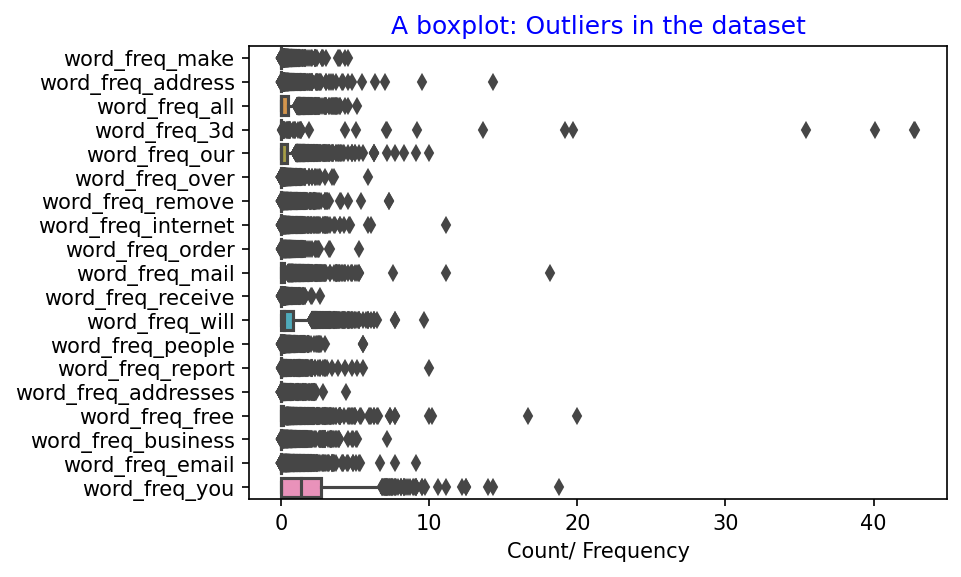

In [ ]:
# check for outliers Part 1 0f 3

colm = df[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you']]
# np.asarray(colu).reshape()
# check for outliers
plt.figure(dpi = 150)
ax = sns.boxplot(data = colm , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

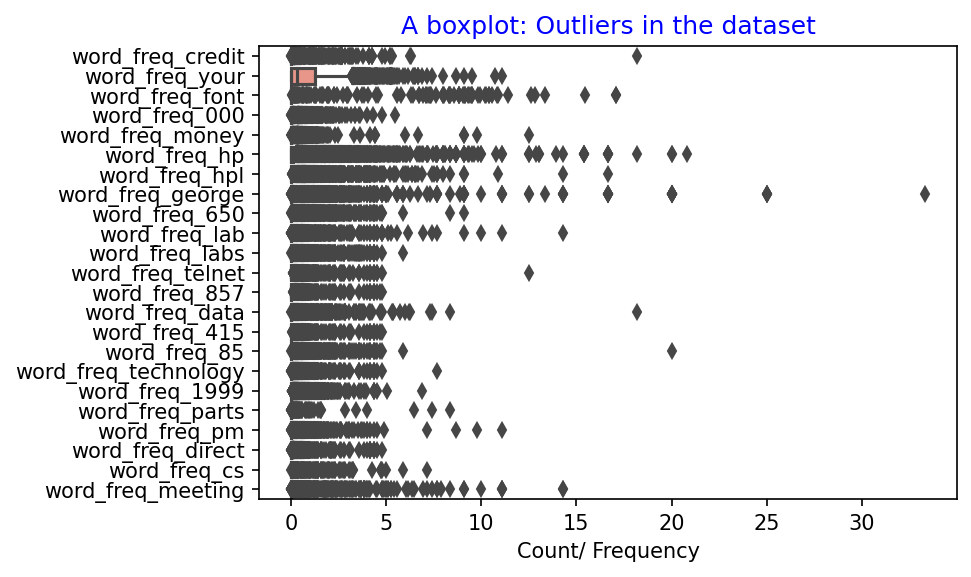

In [ ]:
# check for outliers Part 2 0f 3

colm = df[['word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting']]
# np.asarray(colu).reshape()
# check for outliers
plt.figure(dpi = 150)
ax = sns.boxplot(data = colm , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

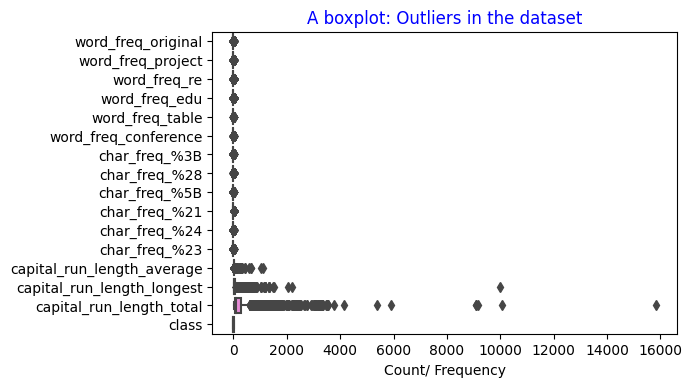

In [ ]:
# check for outliers Part 3 0f 3

colm = df[['word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']]
# np.asarray(colu).reshape()
# check for outliers
plt.figure(dpi = 100)
ax = sns.boxplot(data = colm , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

As you can see our dataset has alot of outliers, since we do not want to lose the information that comes with these outliers; we will use the log feature to scale our data. 

In [ ]:
#****
#The log feature did not work
#Trying to normalize the whole dataset


from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()

scaling.fit_transform(df)

array([[-0.34243371,  0.3308849 ,  0.71285877, ...,  0.04529792,
        -0.00872413,  1.24007366],
       [ 0.3453594 ,  0.05190919,  0.43512954, ...,  0.25056283,
         1.22832407,  1.24007366],
       [-0.14592139, -0.16507191,  0.85172339, ...,  2.22110599,
         3.25873251,  1.24007366],
       ...,
       [ 0.64012787, -0.16507191,  0.03837349, ..., -0.23694133,
        -0.27262775, -0.80640371],
       [ 2.80176333, -0.16507191, -0.55676058, ..., -0.24207296,
        -0.33860365, -0.80640371],
       [-0.34243371, -0.16507191,  0.73269658, ..., -0.24207296,
        -0.40128076, -0.80640371]])

# Exploratory Analysis

I decided to start with multivariate analysis so that going forward I only work with features that have significance impact. 

**Multivariate Analysis**

In [ ]:
#Previewing our dataset

df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
#Checking the shape of our dataset 
#

df.shape

(4210, 58)

In [ ]:
#Using LDA to reduce our features
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


X = df.iloc[ :, 0:56]
y = df.iloc[ :, 57]

def Factor(X, y, n, d):
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


   sc = StandardScaler()
   X_train = sc.fit_transform(X_train)
   X_test = sc.transform(X_test)

   lda = LDA(n_components=n)
   X_train = lda.fit_transform(X_train, y_train)
   X_test = lda.transform(X_test)

   classifier = RandomForestClassifier(max_depth=d, random_state=0)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)

   a = accuracy_score(y_test, y_pred)
   print('Accuracy: ' + str(a))
   def coe():
# Create an LDA object
    lda = LDA(n_components = n)
    x = lda.fit(X, y)
    model = x.transform(X)
    coeff = pd.DataFrame(index = X.columns.values, data=x.coef_[0].T)
    print(coeff.sort_values(0, ascending=True))
   coe()

In [ ]:
#X,y,n,d
# n = components
# d = depth

Factor(X, y, 1, 1)

In [ ]:
Factor(X, y, 2, 1)

In [ ]:
Factor(X, y, 1, 2)

Accuracy: 0.9038004750593824
                                   0
word_freq_table            -1.741863
char_freq_%3B              -1.365097
char_freq_%28              -0.780609
word_freq_original         -0.548763
word_freq_parts            -0.524182
word_freq_conference       -0.511460
word_freq_labs             -0.498922
char_freq_%5B              -0.480389
word_freq_1999             -0.408990
word_freq_data             -0.360685
word_freq_edu              -0.354463
word_freq_meeting          -0.340662
word_freq_re               -0.330667
word_freq_project          -0.306428
word_freq_85               -0.295982
word_freq_will             -0.269270
word_freq_hp               -0.212794
word_freq_telnet           -0.201846
word_freq_hpl              -0.191795
word_freq_george           -0.184385
word_freq_pm               -0.176740
word_freq_cs               -0.139060
word_freq_857              -0.111223
word_freq_lab              -0.087603
word_freq_make             -0.084114
capital_r

The accuracy is still maintained at 0.9038004750593824 and about 20 features will actually contribute to our model. However I decided to work with the ten strongest features.

In [ ]:
#drop
#


In [ ]:
#word_freq_table, char_freq_%3B, char_freq_%28, word_freq_original, word_freq_parts, word_freq_conference, word_freq_labs, char_freq_%5B, word_freq_1999, word_freq_data    
# These are the features we shall used to build our model. 


**Bivariate Analysis**

In [ ]:
#Creating a new dataframe
#

final=df[['word_freq_table', 'char_freq_%3B', 'char_freq_%28', 'word_freq_original', 'word_freq_parts', 'word_freq_conference', 'word_freq_labs', 'char_freq_%5B', 'word_freq_1999', 'word_freq_data','class']]
final.head()

,word_freq_table,char_freq_%3B,char_freq_%28,word_freq_original,word_freq_parts,word_freq_conference,word_freq_labs,char_freq_%5B,word_freq_1999,word_freq_data,class
0,0.0,0.00,0.000,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1
1,0.0,0.00,0.132,0.00,0.0,0.0,0.0,0.0,0.07,0.0,1
2,0.0,0.01,0.143,0.12,0.0,0.0,0.0,0.0,0.00,0.0,1
3,0.0,0.00,0.137,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1
4,0.0,0.00,0.135,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1


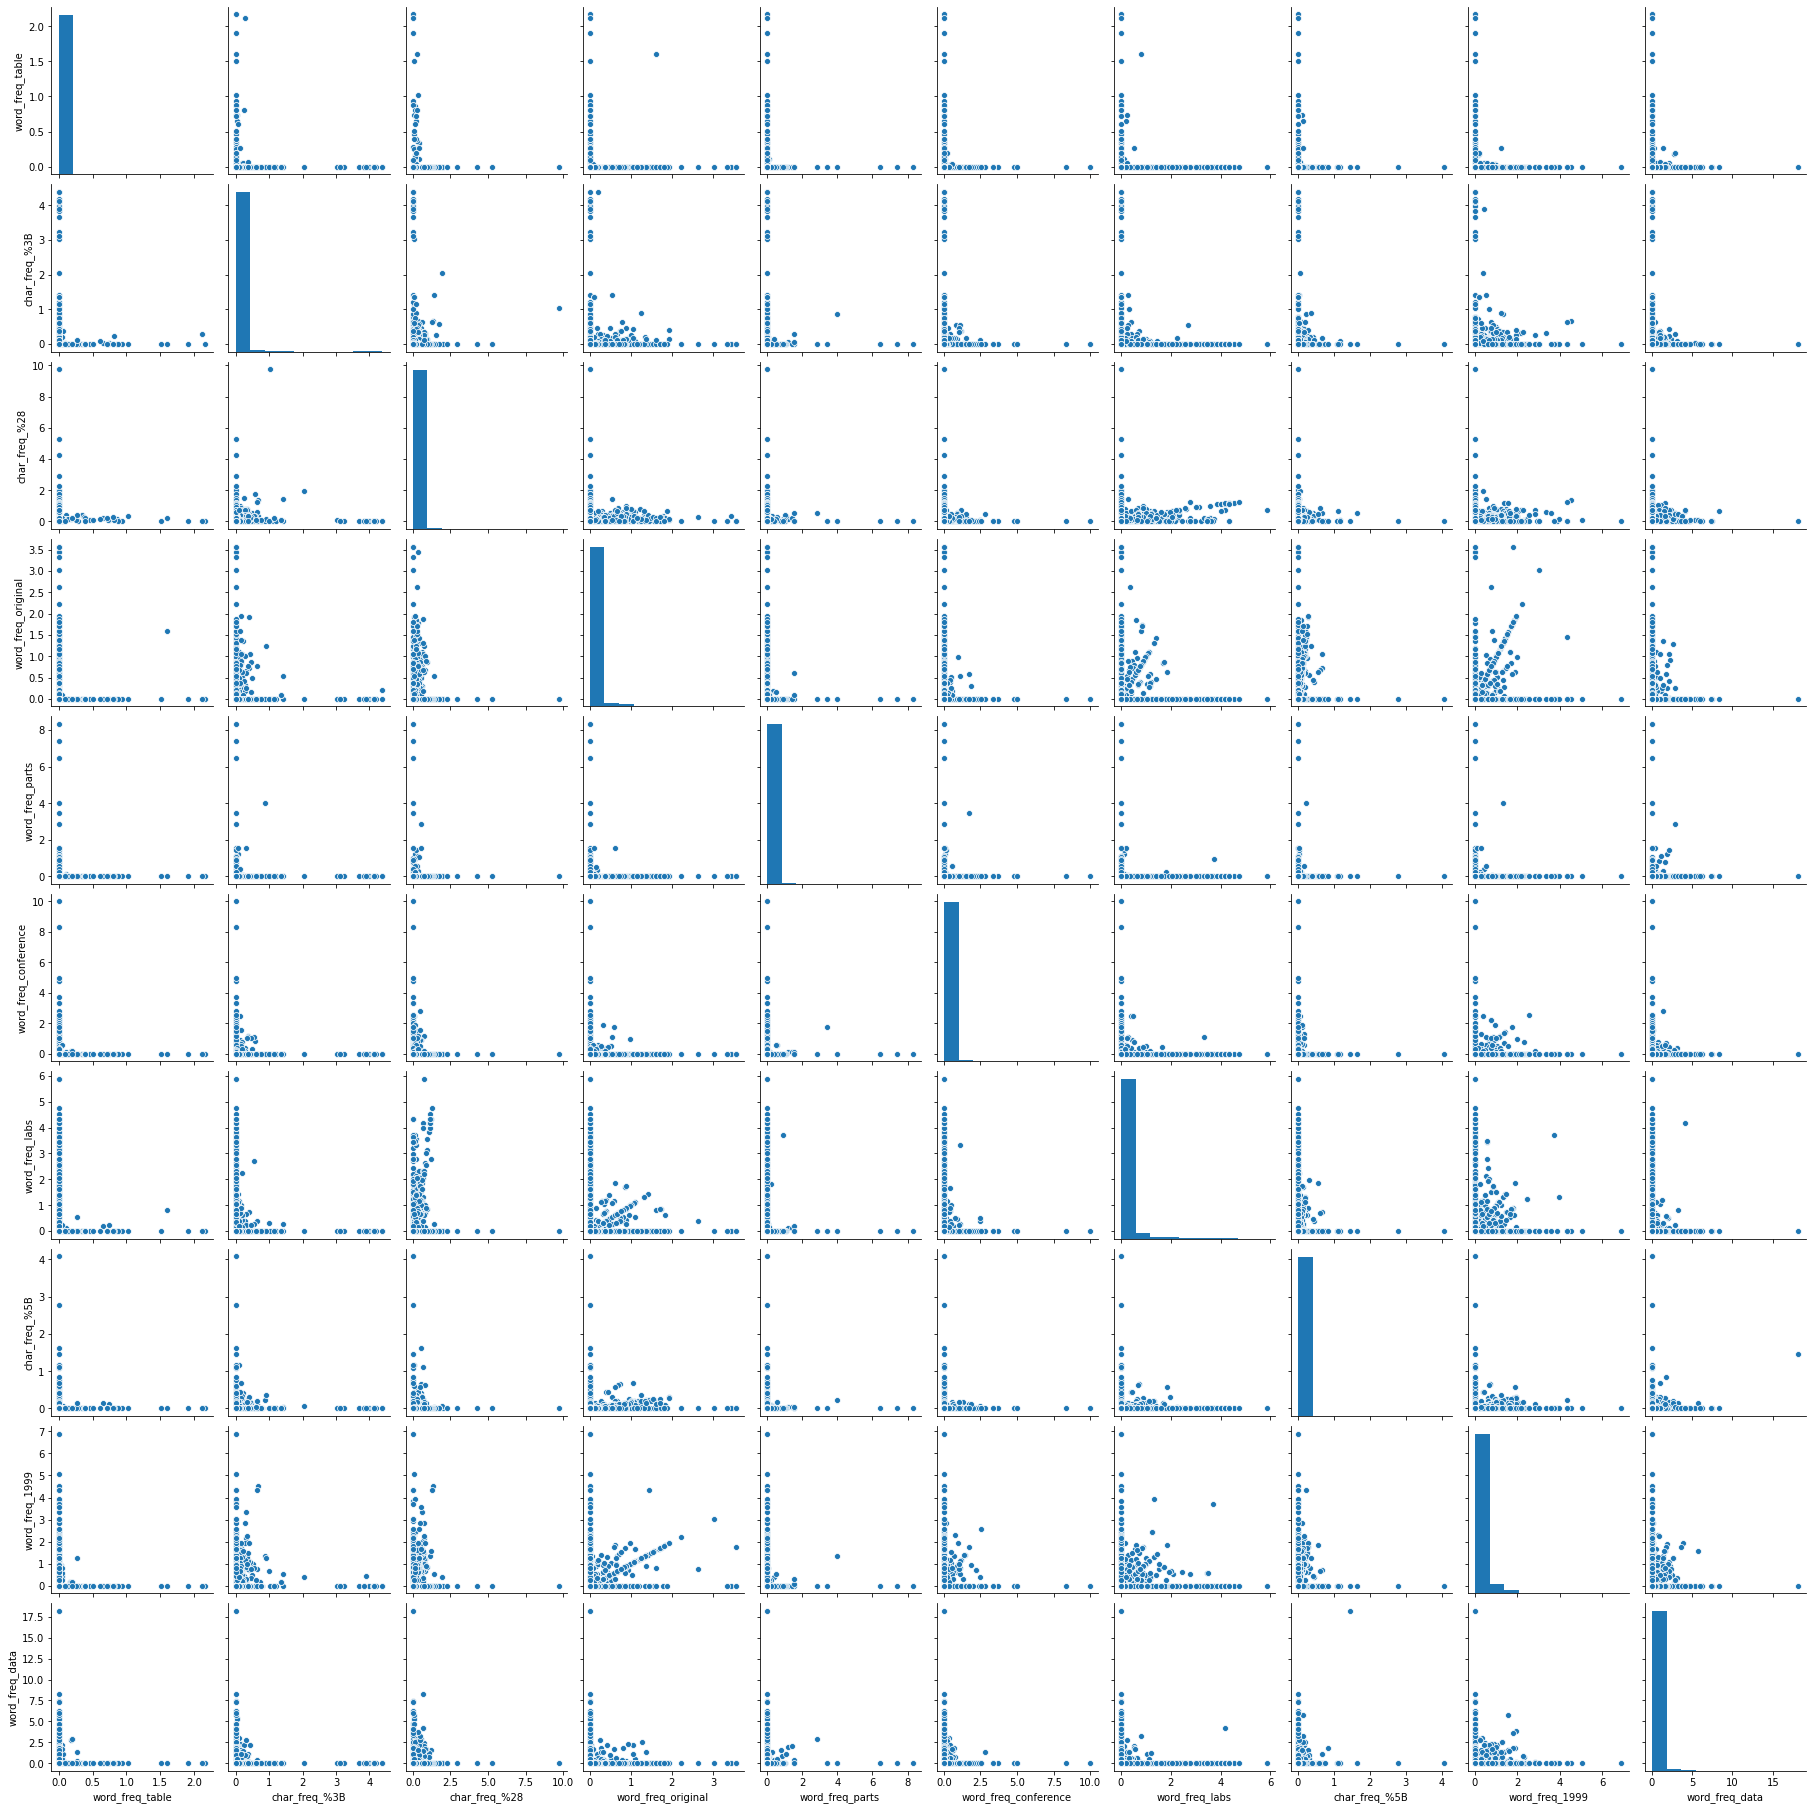

In [ ]:
sns.pairplot(a)
plt.show()

The is very little correlation between our variable, this will be confirmed below.

In [ ]:
#Correlation
#

correlation = final.corr()
correlation

,word_freq_table,char_freq_%3B,char_freq_%28,word_freq_original,word_freq_parts,word_freq_conference,word_freq_labs,char_freq_%5B,word_freq_1999,word_freq_data
word_freq_table,1.000000,0.000209,-0.004595,0.017823,-0.004206,-0.006882,-0.005188,-0.004946,-0.019894,-0.000083
char_freq_%3B,0.000209,1.000000,0.044166,0.014303,0.007664,-0.003110,-0.020702,0.008972,0.038030,-0.006118
char_freq_%28,-0.004595,0.044166,1.000000,0.057262,-0.012101,-0.015248,0.193265,0.022648,0.084304,0.025915
word_freq_original,0.017823,0.014303,0.057262,1.000000,-0.007256,-0.007783,0.075656,0.122188,0.333455,-0.000424
word_freq_parts,-0.004206,0.007664,-0.012101,-0.007256,1.000000,0.017201,-0.003564,0.001845,-0.004271,0.023421
word_freq_conference,-0.006882,-0.003110,-0.015248,-0.007783,0.017201,1.000000,-0.005906,-0.007225,0.048489,0.003635
word_freq_labs,-0.005188,-0.020702,0.193265,0.075656,-0.003564,-0.005906,1.000000,0.006585,0.067080,-0.010337
char_freq_%5B,-0.004946,0.008972,0.022648,0.122188,0.001845,-0.007225,0.006585,1.000000,0.076797,0.123387
word_freq_1999,-0.019894,0.038030,0.084304,0.333455,-0.004271,0.048489,0.067080,0.076797,1.000000,0.047200
word_freq_data,-0.000083,-0.006118,0.025915,-0.000424,0.023421,0.003635,-0.010337,0.123387,0.047200,1.000000


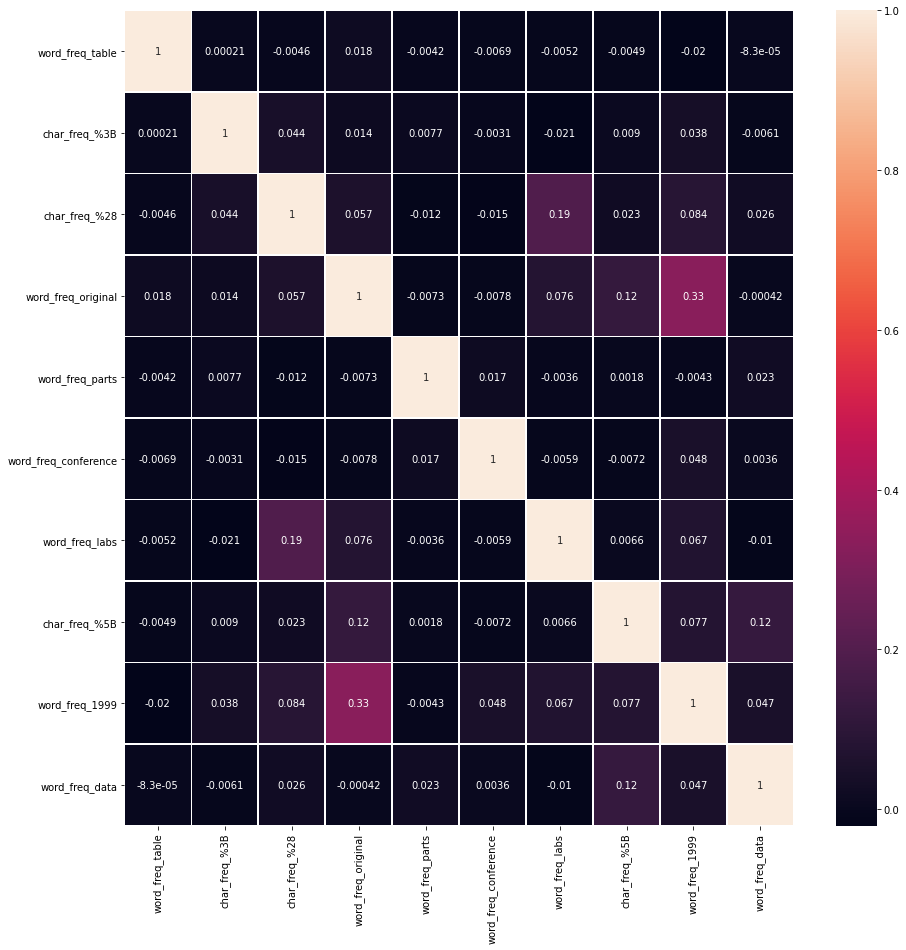

In [ ]:
#Correlation heatmap
#

fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(correlation, annot=True,  linewidths=.5, ax=ax)

# Implementing the Solution

For our model we are going to use the Gaussian Naive Bayes Classifier. 
This type of classifier makes the assumption of normal distribution thus can be best used in cases when all our features are continuous.

**Dataset split into 80-20**

**Checking for multicollinearity**

In [ ]:
#checking for correlation
#

correlation = final.corr()
correlation

,word_freq_table,char_freq_%3B,char_freq_%28,word_freq_original,word_freq_parts,word_freq_conference,word_freq_labs,char_freq_%5B,word_freq_1999,word_freq_data
word_freq_table,1.000000,0.000209,-0.004595,0.017823,-0.004206,-0.006882,-0.005188,-0.004946,-0.019894,-0.000083
char_freq_%3B,0.000209,1.000000,0.044166,0.014303,0.007664,-0.003110,-0.020702,0.008972,0.038030,-0.006118
char_freq_%28,-0.004595,0.044166,1.000000,0.057262,-0.012101,-0.015248,0.193265,0.022648,0.084304,0.025915
word_freq_original,0.017823,0.014303,0.057262,1.000000,-0.007256,-0.007783,0.075656,0.122188,0.333455,-0.000424
word_freq_parts,-0.004206,0.007664,-0.012101,-0.007256,1.000000,0.017201,-0.003564,0.001845,-0.004271,0.023421
word_freq_conference,-0.006882,-0.003110,-0.015248,-0.007783,0.017201,1.000000,-0.005906,-0.007225,0.048489,0.003635
word_freq_labs,-0.005188,-0.020702,0.193265,0.075656,-0.003564,-0.005906,1.000000,0.006585,0.067080,-0.010337
char_freq_%5B,-0.004946,0.008972,0.022648,0.122188,0.001845,-0.007225,0.006585,1.000000,0.076797,0.123387
word_freq_1999,-0.019894,0.038030,0.084304,0.333455,-0.004271,0.048489,0.067080,0.076797,1.000000,0.047200
word_freq_data,-0.000083,-0.006118,0.025915,-0.000424,0.023421,0.003635,-0.010337,0.123387,0.047200,1.000000


In [ ]:
#computing VIF
#

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)


,word_freq_table,char_freq_%3B,char_freq_%28,word_freq_original,word_freq_parts,word_freq_conference,word_freq_labs,char_freq_%5B,word_freq_1999,word_freq_data
word_freq_table,1.001195,-0.000995,0.003003,-0.028509,0.004134,0.005354,0.004836,0.006479,0.028250,-0.002212
char_freq_%3B,-0.000995,1.004381,-0.047716,-0.001247,-0.008634,0.004392,0.032678,-0.006454,-0.036215,0.010410
char_freq_%28,0.003003,-0.047716,1.048336,-0.021223,0.012244,0.017473,-0.197662,-0.011180,-0.064905,-0.025419
word_freq_original,-0.028509,-0.001247,-0.021223,1.143684,0.005185,0.024964,-0.056517,-0.114344,-0.370215,0.031811
word_freq_parts,0.004134,-0.008634,0.012244,0.005185,1.001141,-0.017094,0.000044,-0.000131,0.003890,-0.023921
word_freq_conference,0.005354,0.004392,0.017473,0.024964,-0.017094,1.003786,0.004635,0.008593,-0.059487,-0.001868
word_freq_labs,0.004836,0.032678,-0.197662,-0.056517,0.000044,0.004635,1.045848,0.004991,-0.037213,0.017233
char_freq_%5B,0.006479,-0.006454,-0.011180,-0.114344,-0.000131,0.008593,0.004991,1.032496,-0.034674,-0.125534
word_freq_1999,0.028250,-0.036215,-0.064905,-0.370215,0.003890,-0.059487,-0.037213,-0.034674,1.141212,-0.048540
word_freq_data,-0.002212,0.010410,-0.025419,0.031811,-0.023921,-0.001868,0.017233,-0.125534,-0.048540,1.019261


The VIF scores are all below 2.0 and hence the is no need to drop any feature. 

Modelling 

In [ ]:
#Additional libraries

# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Get the features and label
#

X = df[['word_freq_table', 'char_freq_%3B', 'char_freq_%28', 'word_freq_original', 'word_freq_parts', 'word_freq_conference', 'word_freq_labs', 'char_freq_%5B', 'word_freq_1999', 'word_freq_data']]
y = df['class']



In [ ]:
def gau(X, y):
  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)
  
  #Create a Gaussian Classifier
  model = GaussianNB()

  # Train the model using the training sets
  model.fit(X_train, y_train)

  #Predict Output
  predicted= model.predict(X_test) # 0:edible , 1: poisonous
  print("Predicted Value:", predicted)

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:", accuracy_score(y_test, predicted))

In [ ]:
gau(X, y)

Predicted Value: [0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1
 1 1 1 1

**Dataset split into 60-40**

In [ ]:
def gau(X, y):
  # Split dataset into training set and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=109)
  
  #Create a Gaussian Classifier
  model = GaussianNB()

  # Train the model using the training sets
  model.fit(X_train, y_train)

  #Predict Output
  predicted= model.predict(X_test) # 0:edible , 1: poisonous
  print("Predicted Value:", predicted)

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:", accuracy_score(y_test, predicted))

In [ ]:
gau(X, y)

Predicted Value: [0 0 0 ... 1 1 1]
Accuracy: 0.582541567695962


# Challenging the Solution

The accuracy of both of our models is not so good, but above 0.5. Model 1 had an accuracy of 0.5724465558194775 while 2 had an accuracy of 0.582541567695962. 

We need to investigate further and see what we can do to make our model more accurate.

# Follow up Questions

1.   Did we have the right data? **Yes**


2.   Do we need other data to answer our question? **No**


3.   Did we have the right question? **Yes**

# Conclusion

The accuracy of both of our models is not so good, but above 0.5. Model 1 had an accuracy of 0.5724465558194775 while 2 had an accuracy of 0.58254156769596

The close the slipt to a 50/50 split the more the accuracy increases. 